# Training

In [1]:
%%capture
%pip install -r requirements.txt

In [2]:
import numpy as np
import tensorflow as tf;
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from entanglement_witnesses import witnesses
import mlflow

2024-05-21 14:41:23.704538: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-21 14:41:23.734597: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-21 14:41:24.203480: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
mlflow.set_tracking_uri(
    "http://localhost:5000"
)

In [4]:
def get_model(name, data_file_path):

    data = np.load(data_file_path)
    simulated_states = data["states"]
    simulated_labels = data["labels"]

    model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(simulated_states.shape[1],)),  # Adjust input shape based on your data
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
    ])

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    X_train, X_val, y_train, y_val = train_test_split(simulated_states, simulated_labels, test_size=0.2, random_state=42)
    history = model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val))

    # Start an MLflow run and log the model
    with mlflow.start_run() as run:
        # Log the model
        mlflow.tensorflow.log_model(model, "model")

        # Log parameters
        mlflow.log_param("witness", name)

        # Evaluate the model and log metrics
        loss, accuracy = model.evaluate(X_val, y_val)
        mlflow.log_metric("loss", loss)
        mlflow.log_metric("accuracy", accuracy)
        
        # Register the model
        model_name = "QuantumStateClassifier-" + name
        model_uri = f"runs:/{run.info.run_id}/model"
        mlflow.register_model(model_uri, model_name)
        print(f"Model saved in run {run.info.run_id}")

    plt.plot(history.history['accuracy'], label='Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model {} Accuracy'.format(name))
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend()
    plt.show()
    
    plt.plot(history.history['loss'], label='Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model {} Loss'.format(name))
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.show()

    return model

Epoch 1/20


/home/faical/anaconda3/envs/quantum-entanglement/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-05-21 14:41:25.243091: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05-21 14:41:25.267883: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentati

 86/150 ━━━━━━━━━━━━━━━━━━━━ 0s 593us/step - accuracy: 0.6489 - loss: 0.6453

I0000 00:00:1716295286.613750   83915 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


150/150 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6593 - loss: 0.6229 - val_accuracy: 0.8475 - val_loss: 0.4219
Epoch 2/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 763us/step - accuracy: 0.8854 - loss: 0.3243 - val_accuracy: 0.9575 - val_loss: 0.1483
Epoch 3/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 833us/step - accuracy: 0.9590 - loss: 0.1339 - val_accuracy: 0.9683 - val_loss: 0.0948
Epoch 4/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 806us/step - accuracy: 0.9792 - loss: 0.0825 - val_accuracy: 0.9742 - val_loss: 0.0732
Epoch 5/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 761us/step - accuracy: 0.9829 - loss: 0.0691 - val_accuracy: 0.9800 - val_loss: 0.0640
Epoch 6/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 912us/step - accuracy: 0.9853 - loss: 0.0570 - val_accuracy: 0.9792 - val_loss: 0.0651
Epoch 7/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 829us/step - accuracy: 0.9854 - loss: 0.0585 - val_accuracy: 0.9833 - val_loss: 0.0574
Epoch 8/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 725us/step - accuracy: 0.9870 - loss: 0.0522 - val_accuracy:

2024/05/21 14:41:29 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 515us/step - accuracy: 0.9919 - loss: 0.0276


/home/faical/anaconda3/envs/quantum-entanglement/lib/python3.11/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
Registered model 'QuantumStateClassifier-CONCURRENCE' already exists. Creating a new version of this model...
2024/05/21 14:41:32 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: QuantumStateClassifier-CONCURRENCE, version 21
Created version '21' of model 'QuantumStateClassifier-CONCURRENCE'.


Model saved in run 81be2eb827cf406a81c210426e945d64


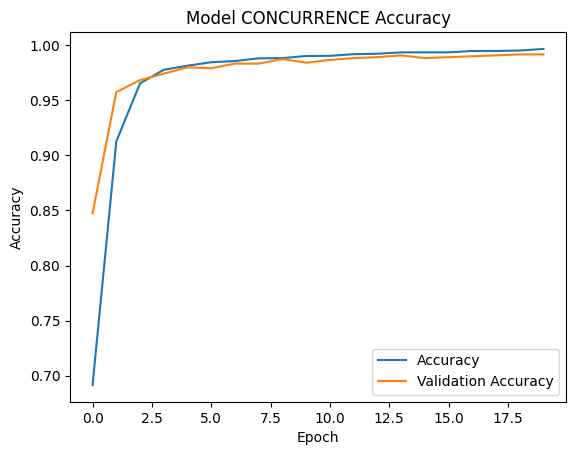

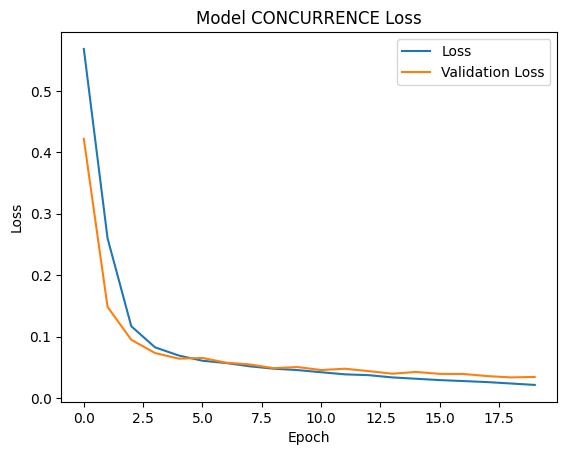

Epoch 1/20


/home/faical/anaconda3/envs/quantum-entanglement/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6483 - loss: 0.6176 - val_accuracy: 0.8300 - val_loss: 0.4076
Epoch 2/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 862us/step - accuracy: 0.8932 - loss: 0.3173 - val_accuracy: 0.9542 - val_loss: 0.1395
Epoch 3/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 738us/step - accuracy: 0.9594 - loss: 0.1201 - val_accuracy: 0.9725 - val_loss: 0.0800
Epoch 4/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 731us/step - accuracy: 0.9823 - loss: 0.0720 - val_accuracy: 0.9808 - val_loss: 0.0542
Epoch 5/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 783us/step - accuracy: 0.9869 - loss: 0.0439 - val_accuracy: 0.9867 - val_loss: 0.0415
Epoch 6/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 749us/step - accuracy: 0.9921 - loss: 0.0331 - val_accuracy: 0.9908 - val_loss: 0.0346
Epoch 7/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 751us/step - accuracy: 0.9945 - loss: 0.0246 - val_accuracy: 0.9908 - val_loss: 0.0288
Epoch 8/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 723us/step - accuracy: 0.9931 - loss: 0.0226 - val_accuracy:

2024/05/21 14:41:35 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 603us/step - accuracy: 0.9945 - loss: 0.0115   


Registered model 'QuantumStateClassifier-ENTROPY' already exists. Creating a new version of this model...
2024/05/21 14:41:37 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: QuantumStateClassifier-ENTROPY, version 18


Model saved in run 6d6b812780834cf684e4ce3540e5e849


Created version '18' of model 'QuantumStateClassifier-ENTROPY'.


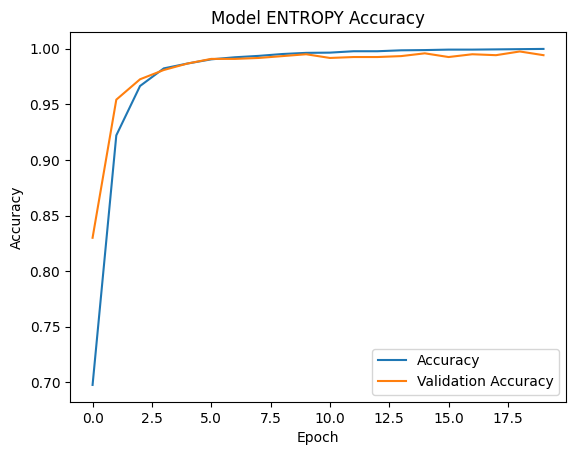

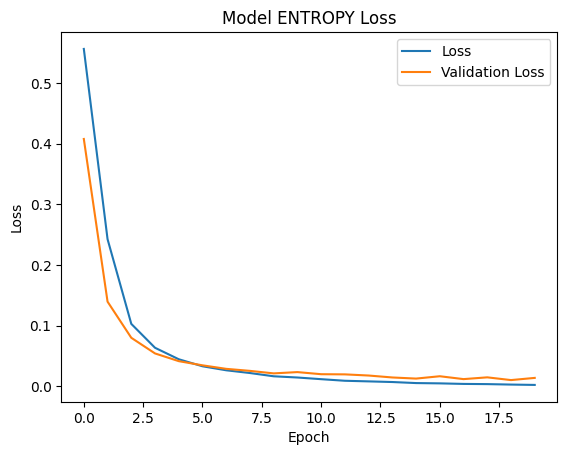

Epoch 1/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6860 - loss: 0.5936 - val_accuracy: 0.8992 - val_loss: 0.3741
Epoch 2/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 893us/step - accuracy: 0.9111 - loss: 0.2859 - val_accuracy: 0.9542 - val_loss: 0.1269
Epoch 3/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9642 - loss: 0.1145 - val_accuracy: 0.9667 - val_loss: 0.0762
Epoch 4/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 925us/step - accuracy: 0.9818 - loss: 0.0607 - val_accuracy: 0.9850 - val_loss: 0.0480
Epoch 5/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 919us/step - accuracy: 0.9877 - loss: 0.0416 - val_accuracy: 0.9842 - val_loss: 0.0390
Epoch 6/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 982us/step - accuracy: 0.9923 - loss: 0.0294 - val_accuracy: 0.9900 - val_loss: 0.0276
Epoch 7/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 776us/step - accuracy: 0.9918 - loss: 0.0223 - val_accuracy: 0.9908 - val_loss: 0.0217
Epoch 8/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 727us/step - accuracy: 0.9934 - loss: 0.0192 - val_

2024/05/21 14:41:41 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 679us/step - accuracy: 0.9996 - loss: 0.0035   


Registered model 'QuantumStateClassifier-NEGATIVITY' already exists. Creating a new version of this model...
2024/05/21 14:41:43 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: QuantumStateClassifier-NEGATIVITY, version 18


Model saved in run 1060880b2e8d45eea760c5e398f03e40


Created version '18' of model 'QuantumStateClassifier-NEGATIVITY'.


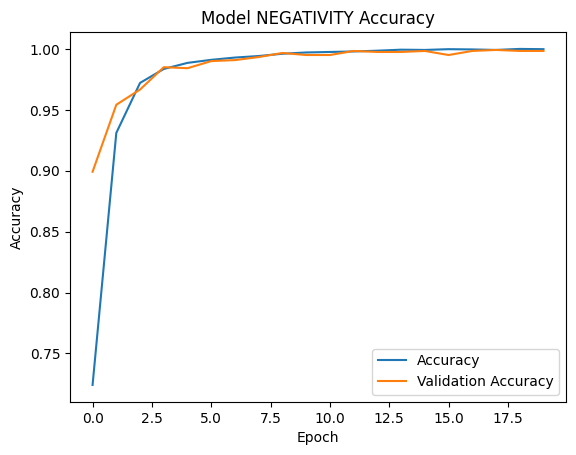

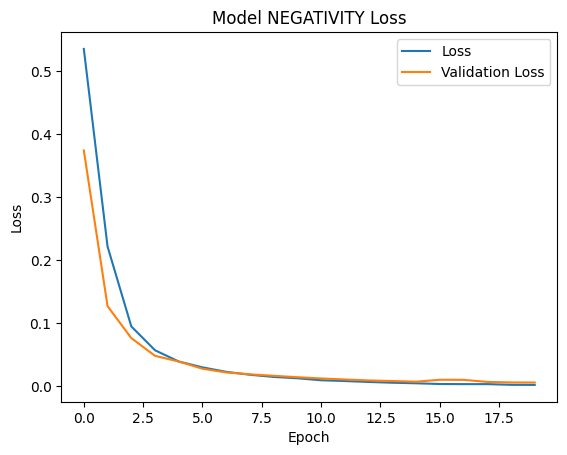

Epoch 1/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7047 - loss: 0.5946 - val_accuracy: 0.7508 - val_loss: 0.4752
Epoch 2/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 943us/step - accuracy: 0.7664 - loss: 0.4437 - val_accuracy: 0.8450 - val_loss: 0.3673
Epoch 3/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 779us/step - accuracy: 0.8667 - loss: 0.3267 - val_accuracy: 0.8550 - val_loss: 0.2864
Epoch 4/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 822us/step - accuracy: 0.8958 - loss: 0.2689 - val_accuracy: 0.9042 - val_loss: 0.2285
Epoch 5/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 826us/step - accuracy: 0.9272 - loss: 0.2006 - val_accuracy: 0.9542 - val_loss: 0.1662
Epoch 6/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 779us/step - accuracy: 0.9554 - loss: 0.1551 - val_accuracy: 0.9558 - val_loss: 0.1382
Epoch 7/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 699us/step - accuracy: 0.9531 - loss: 0.1314 - val_accuracy: 0.9533 - val_loss: 0.1163
Epoch 8/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 737us/step - accuracy: 0.9649 - loss: 0.1092 - va

2024/05/21 14:41:47 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 521us/step - accuracy: 0.9867 - loss: 0.0449


Registered model 'QuantumStateClassifier-CHSH' already exists. Creating a new version of this model...
2024/05/21 14:41:49 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: QuantumStateClassifier-CHSH, version 38


Model saved in run 2183840f96ad4254bce973a9e37859ed


Created version '38' of model 'QuantumStateClassifier-CHSH'.


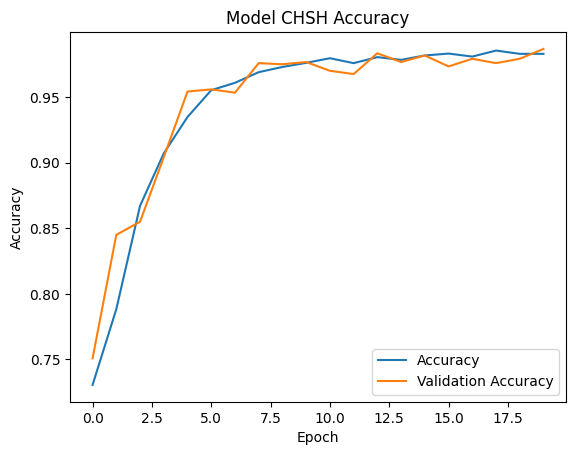

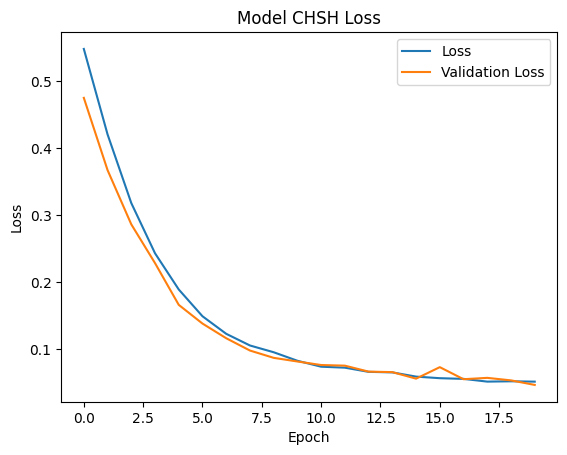

In [5]:
models = {}

mlflow.set_experiment('ML Quantum entanglement')

for name, witness in witnesses.items():
    data_file_path = "./simulated_data/simulation-{}.npz".format(name)
    model = get_model(name, data_file_path)
    models[name] = {"model": model, "witness": witness}
